I had a "miraculous" result, just making up my own portfolio intuitively, 
and somehow it beat out the other portfolios, looking like a competitor to GoldenButterly:
 - 30% TSM
 - 20% SCV
 - 20% STT
 - 20% REIT
 - 10% GLD

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns

# Read sqlite query results into a pandas DataFrame
def query(query):
    con = sqlite3.connect("output/portfolios_varying_percentages.sqlite")
    df = pd.read_sql_query(query, con)
    con.close()
    return df

In [6]:
p1 = query("SELECT COUNT(*) AS c FROM portfolios")['c'][0]
print("portfolios:", p1)

portfolios: 2145


2145


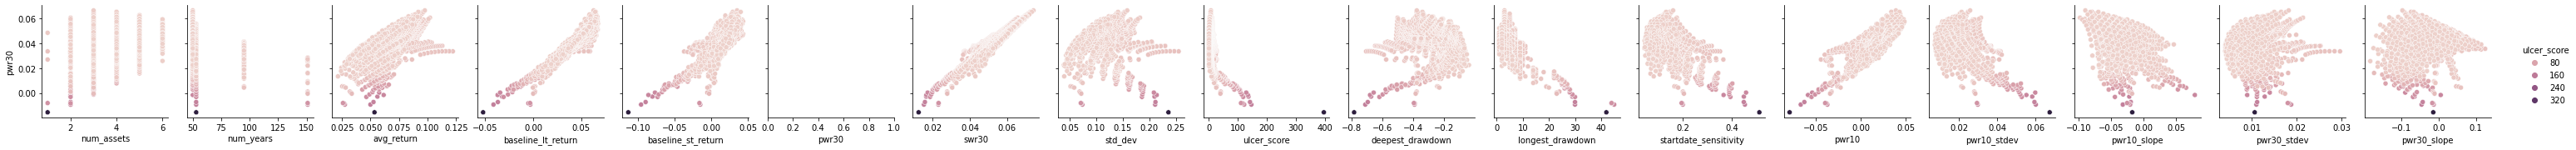

In [7]:
# get a sense of the shape of the graphs (ran with percentages in 10% steps)
df = query("""
  SELECT * FROM portfolios
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

39046


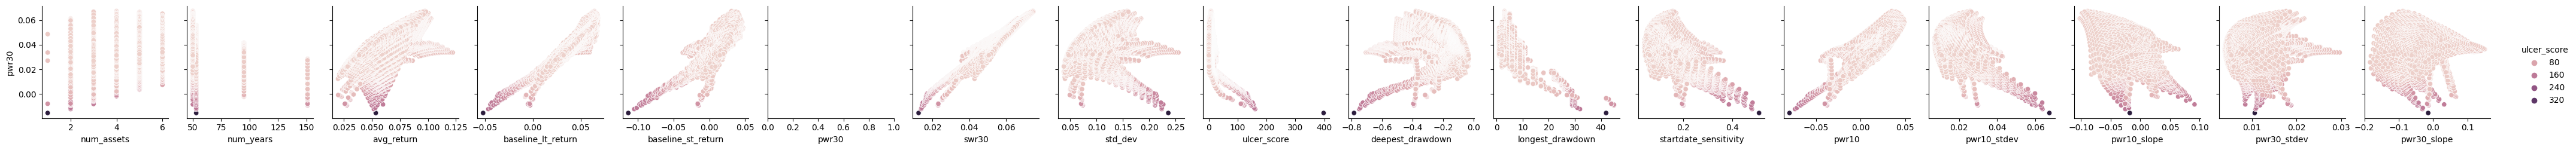

In [8]:
# get a sense of the shape of the graphs (ran with percentages in 5% steps)
df = query("""
  SELECT * FROM portfolios
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

31721


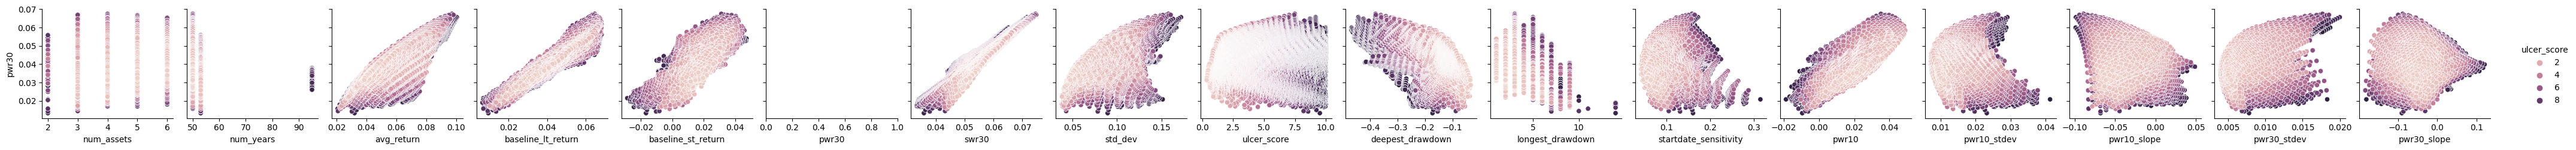

In [9]:
# tighten: ulcer_score
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

9311


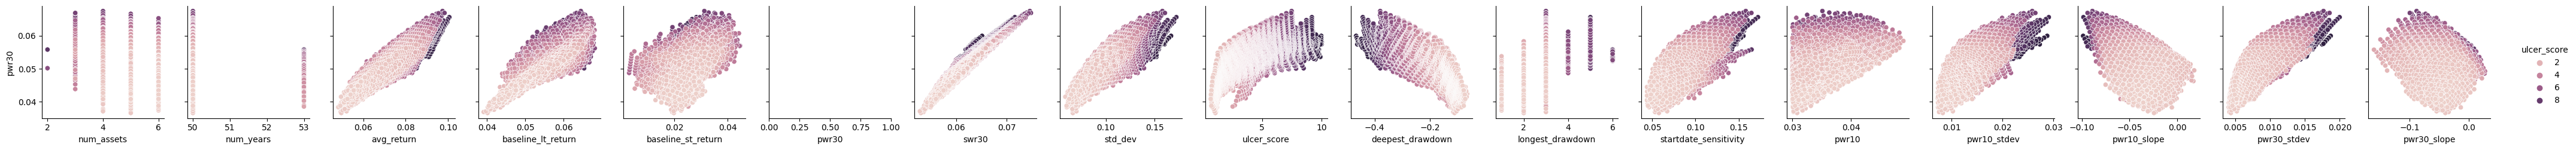

In [10]:
# tighten: pwr10
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

9311


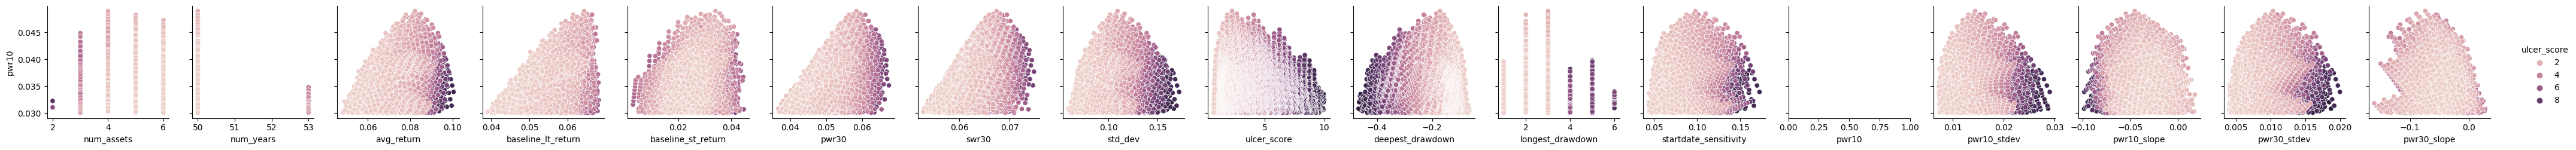

In [11]:
# graph y-axis: pwr10 instead of pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

6904


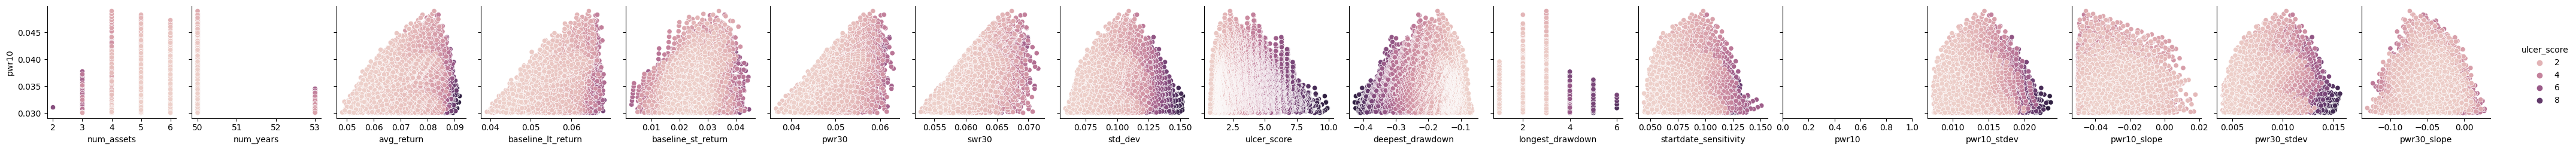

In [13]:
# tighten: pwr10_slope
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

4576


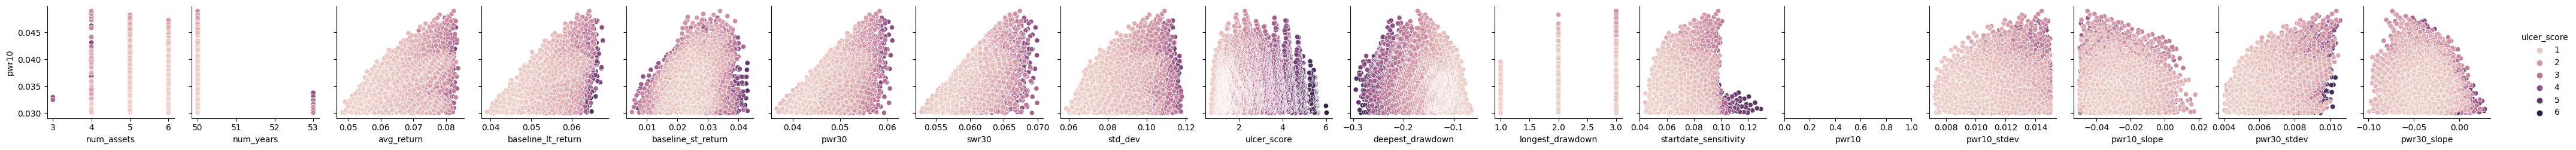

In [14]:
# tighten: pwr10_stdev
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

3303


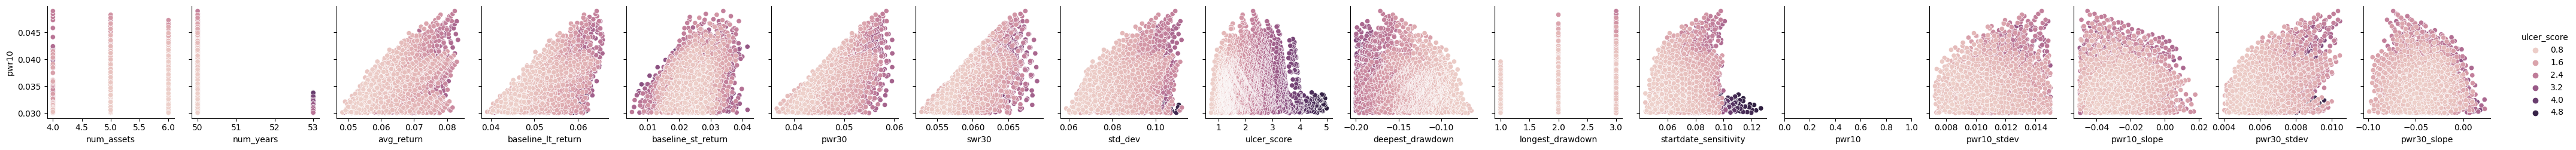

In [15]:
# tighten: deepest_drawdown
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
    AND deepest_drawdown > -0.2
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

302


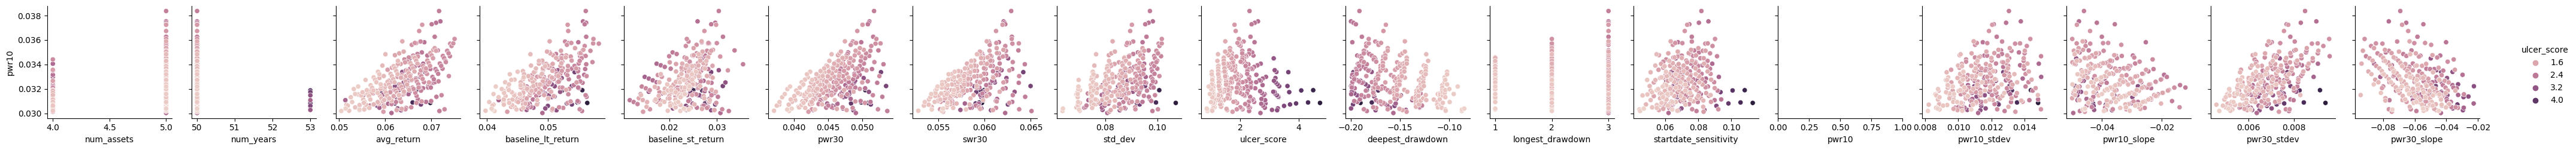

In [16]:
# eliminate portfolios having LTT
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
    AND deepest_drawdown > -0.2
    AND INSTR(assets, '|LTT|') == 0
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

44


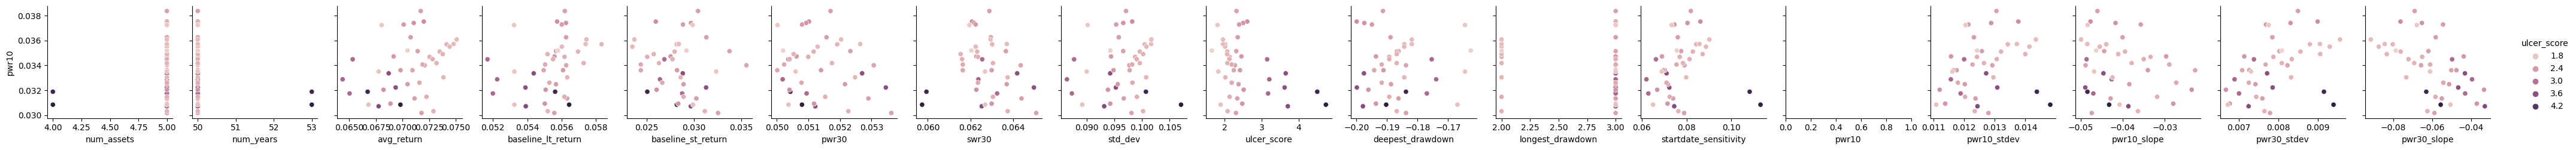

In [17]:
# tighten: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
    AND pwr30 > 0.05
    AND deepest_drawdown > -0.2
    AND INSTR(assets, '|LTT|') == 0
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

19


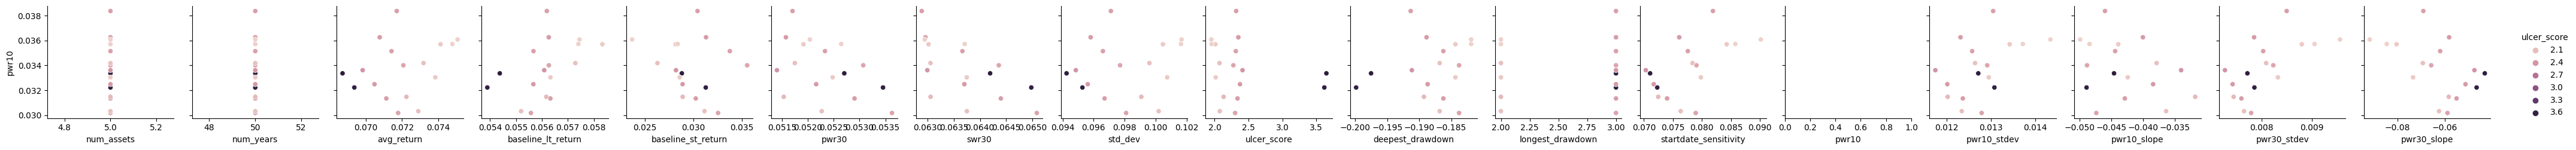

In [18]:
# tighten: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.03
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
    AND pwr30 > 0.0514
    AND deepest_drawdown > -0.2
    AND INSTR(assets, '|LTT|') == 0
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

10


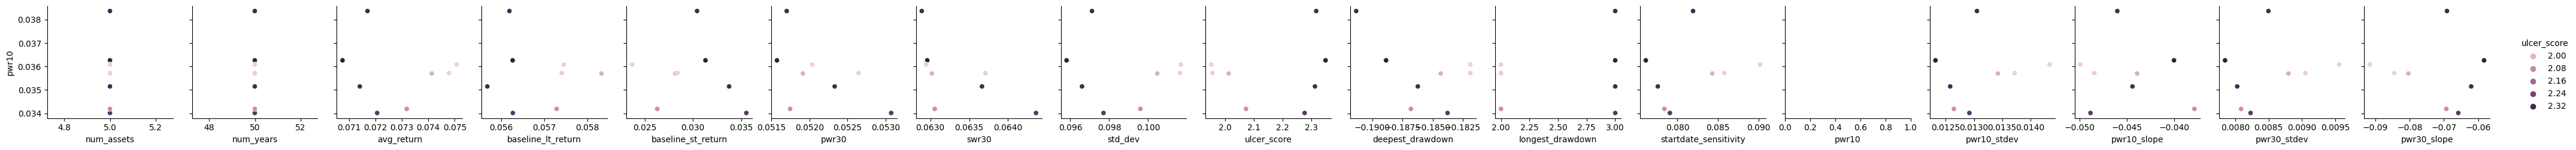

In [19]:
# tighten: pwr10
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.034
    AND pwr10_slope > -0.05 
    AND pwr10_stdev < 0.015
    AND pwr30 > 0.0514
    AND deepest_drawdown > -0.2
    AND INSTR(assets, '|LTT|') == 0
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')